# Final Project

In [1]:
import os
for dirname, _, filenames in os.walk(os.getcwd()):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\luxin\iCloudDrive\UR\Machine learning\final\riiid-test-answer-prediction\EDA.ipynb
C:\Users\luxin\iCloudDrive\UR\Machine learning\final\riiid-test-answer-prediction\example_sample_submission.csv
C:\Users\luxin\iCloudDrive\UR\Machine learning\final\riiid-test-answer-prediction\example_test.csv
C:\Users\luxin\iCloudDrive\UR\Machine learning\final\riiid-test-answer-prediction\lectures.csv
C:\Users\luxin\iCloudDrive\UR\Machine learning\final\riiid-test-answer-prediction\questions.csv
C:\Users\luxin\iCloudDrive\UR\Machine learning\final\riiid-test-answer-prediction\train.csv
C:\Users\luxin\iCloudDrive\UR\Machine learning\final\riiid-test-answer-prediction\.ipynb_checkpoints\EDA-checkpoint.ipynb
C:\Users\luxin\iCloudDrive\UR\Machine learning\final\riiid-test-answer-prediction\riiideducation\competition.cpython-37m-x86_64-linux-gnu.so
C:\Users\luxin\iCloudDrive\UR\Machine learning\final\riiid-test-answer-prediction\riiideducation\__init__.py
C:\Users\luxin\iCloudDrive\UR\Machine lear

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_df=pd.read_csv('train.csv')
que_info_df=pd.read_csv('questions.csv')
lec_info_df=pd.read_csv('lectures.csv')

In [4]:
train_df.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


In [5]:
#Dtype of the train dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int64  
 5   task_container_id               int64  
 6   user_answer                     int64  
 7   answered_correctly              int64  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
dtypes: float64(1), int64(8), object(1)
memory usage: 7.5+ GB


In [6]:
#Check NaN value
train_df.isnull().sum(axis = 0)

row_id                                  0
timestamp                               0
user_id                                 0
content_id                              0
content_type_id                         0
task_container_id                       0
user_answer                             0
answered_correctly                      0
prior_question_elapsed_time       2351538
prior_question_had_explanation     392506
dtype: int64

## Interaction Data

In [7]:
num=train_df.shape[0]
print(f'Interaction number in train data set is {num}')
user_num=train_df.user_id.unique().shape[0]
print(f'User number in train data set is {user_num}')
print(f'Average interactions of each user is {int(num/user_num)}')

Interaction number in train data set is 101230332
User number in train data set is 393656
Average interactions of each user is 257


In [9]:
print(f"We have {train_df.content_id.nunique()} in the train data set, among those {train_df[train_df.content_type_id==0].content_id.nunique()} are questions and {train_df[train_df.content_type_id==1].content_id.nunique()} are lectures ")

We have 13782 in the train data set, among those 13523 are questions and 415 are lectures 


In [ ]:
train_df.content_type_idtrain_df.content_type_id.unique

In [10]:
train_df[train_df["content_type_id"]==0]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False
...,...,...,...,...,...,...,...,...,...,...
101230327,101230327,428564420,2147482888,3586,0,22,0,1,18000.0,True
101230328,101230328,428585000,2147482888,6341,0,23,3,1,14000.0,True
101230329,101230329,428613475,2147482888,4212,0,24,3,1,14000.0,True
101230330,101230330,428649406,2147482888,6343,0,25,1,0,22000.0,True


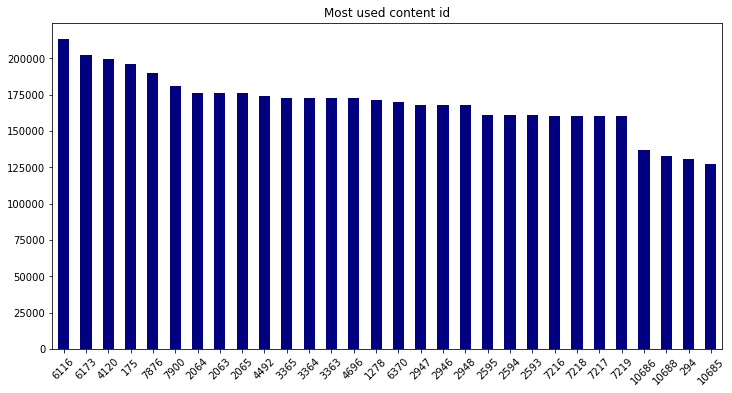

In [11]:
#content of interactions
f_con = train_df.content_id.value_counts()[:30]

fig = plt.figure(figsize=(12,6))
ax = f_con.plot.bar(color='navy')
plt.title("Most used content id")
plt.xticks(rotation=45)
plt.show()

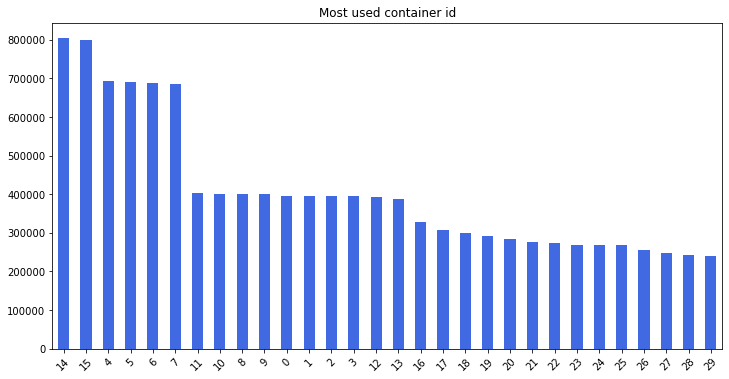

In [12]:
#container of interactions
f_con = train_df.task_container_id.value_counts()[:30]

fig = plt.figure(figsize=(12,6))
ax = f_con.plot.bar(color='royalblue')
plt.title("Most used container id")
plt.xticks(rotation=45)
plt.show()

Text(0.5, 0.98, 'Question Elapse time for top users')

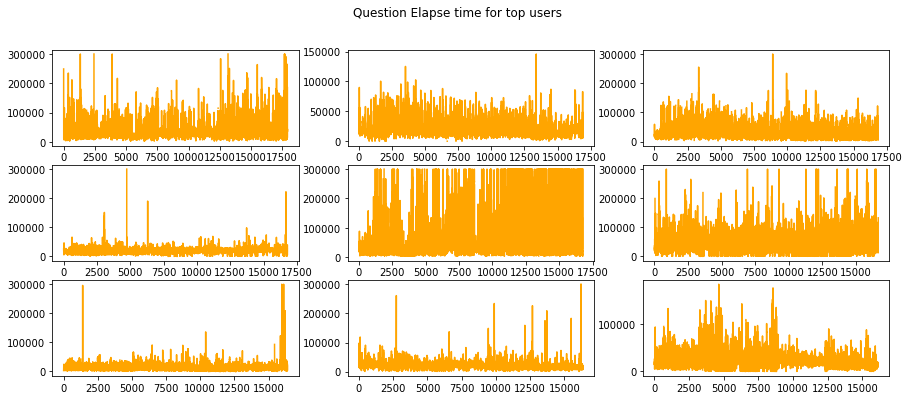

In [13]:
#Time of the cost
top_users=train_df.user_id.value_counts()[:9]

fig, axs = plt.subplots(3, 3,figsize=(15,6))

for i in range(len(top_users.index)):
    user=top_users.index[i]
    x=range(len(train_df[train_df.user_id==user]))
    y=train_df[train_df.user_id==user].prior_question_elapsed_time
    plt.subplot(3, 3, i+1)
    plt.plot(x,y,color='orange')
fig.suptitle('Question Elapse time for top users')

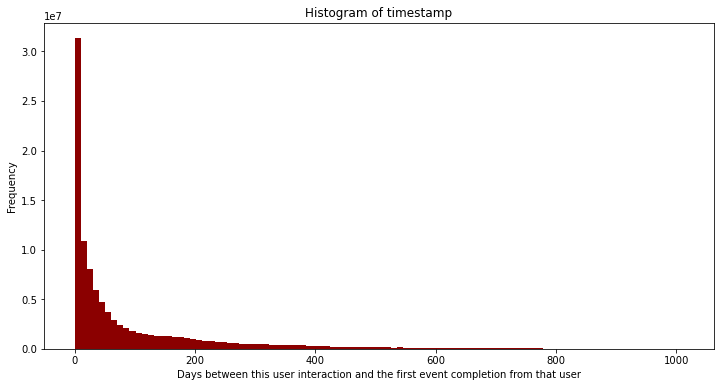

In [14]:
#Average prior question interval
ts = train_df.timestamp/(86400000)
fig = plt.figure(figsize=(12,6))
ts.plot.hist(bins=100,color='darkred')
plt.title("Histogram of timestamp")
plt.xticks(rotation=0)
plt.xlabel("Days between this user interaction and the first event completion from that user")
plt.show()

Text(0.5, 1.0, 'Answer result of questions interactions')

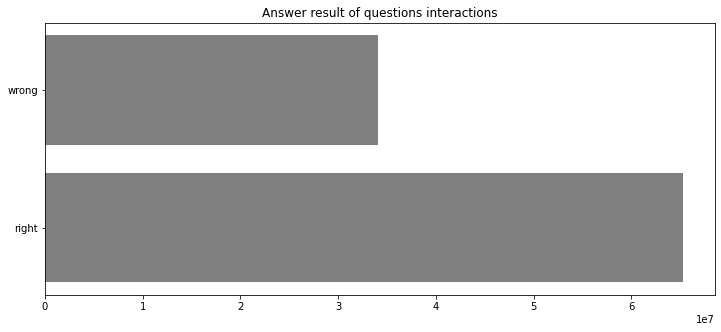

In [15]:
ans_count=train_df[train_df.answered_correctly!=-1].answered_correctly.value_counts()
fig = plt.figure(figsize=(12,5))
plt.barh(['right','wrong'],ans_count.values,color='grey')
plt.title("Answer result of questions interactions")

In [16]:
#extract all question interaction
que_df=train_df[train_df.content_type_id==0]


In [17]:
#correct rate
que_rate=que_df[["content_id","answered_correctly"]].groupby("content_id").sum()/que_df[["content_id","answered_correctly"]].groupby("content_id").count()


Text(0, 0.5, 'Frequency')

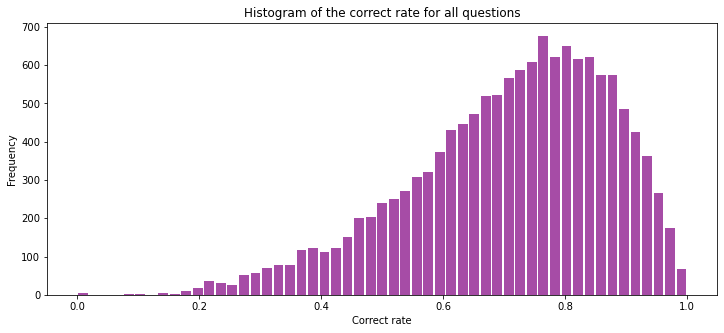

In [18]:
fig = plt.figure(figsize=(12,5))
plt.hist(que_rate["answered_correctly"],bins='auto', color='purple',alpha=0.7, rwidth=0.85)
plt.title('Histogram of the correct rate for all questions')
plt.xlabel('Correct rate')
plt.ylabel('Frequency')

## Questions

In [19]:
que_info_df.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [20]:
#Check NaN value
que_info_df.isnull().sum(axis = 0)

question_id       0
bundle_id         0
correct_answer    0
part              0
tags              1
dtype: int64

Seems alright with only one NaN item

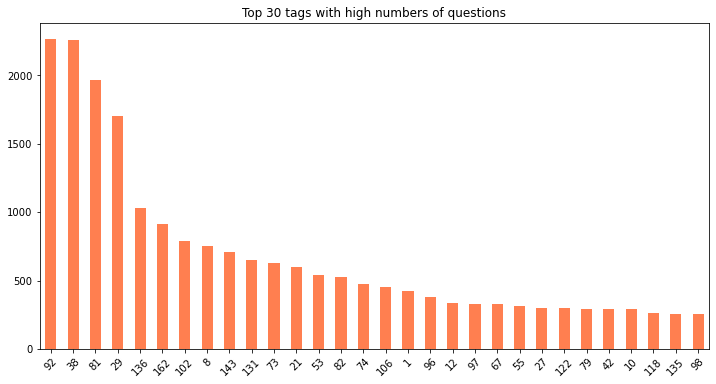

In [46]:
# Check how many tags
que_info_df['tags'] = que_info_df['tags'].astype(str)
print("")
tag_num=que_info_df['tags'][que_info_df['tags'] != "nan"].str.split(' ',expand=True).stack().value_counts()[:30]
fig = plt.figure(figsize=(12,6))
ax = tag_num.plot.bar(color='coral')
plt.title("Top 30 tags with high numbers of questions")
plt.xticks(rotation=45)
plt.show()

Here we list out the statistical information for each questions

In [19]:
que_right=que_df[["content_id","answered_correctly"]].groupby("content_id").sum()
que_num=que_df[["content_id","answered_correctly"]].groupby("content_id").count()
que_right.columns=['right_num']
que_num.columns=['num']
if 'num'in que_info_df.columns:
    que_info_df.drop('num')
if 'right_num'in que_info_df.columns:
    que_info_df.drop('right_num')
que_info_df=que_info_df.join(que_right).join(que_num)
que_info_df['wrong_num']=que_info_df['num']-que_info_df['right_num']
que_info_df['rate']=que_info_df['right_num']/que_info_df['num']

In [20]:
que_info_df

,question_id,bundle_id,correct_answer,part,tags,right_num,num,wrong_num,rate
0,0,0,0,1,51 131 162 38,6266,6903,637,0.907721
1,1,1,1,1,131 36 81,6589,7398,809,0.890646
2,2,2,0,1,131 101 162 92,24890,44905,20015,0.554281
3,3,3,0,1,131 149 162 29,17906,22973,5067,0.779437
4,4,4,3,1,131 5 162 38,19461,31736,12275,0.613215
...,...,...,...,...,...,...,...,...,...
13518,13518,13518,3,5,14,683,868,185,0.786866
13519,13519,13519,3,5,8,528,924,396,0.571429
13520,13520,13520,2,5,73,579,861,282,0.672474
13521,13521,13521,0,5,125,703,870,167,0.808046


Here we have the answer situation for each questions appeared in train data set

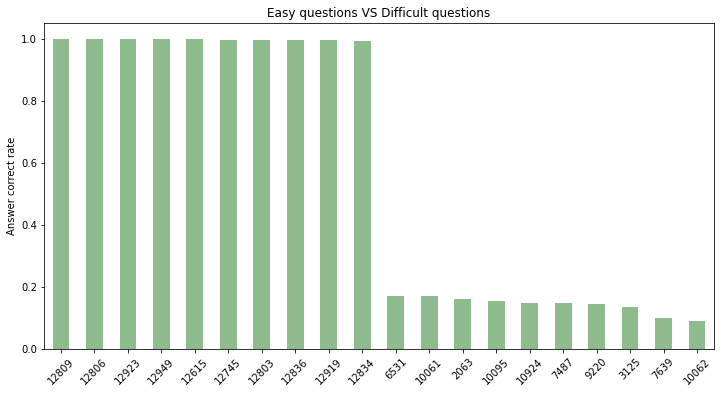

In [47]:
que_info_df[que_info_df.num>100].rate.sort_values(ascending=False)[:10]
que_rate=pd.concat([que_info_df[que_info_df.num>100].rate.sort_values(ascending=False)[:10],que_info_df[que_info_df.num>100].rate.sort_values(ascending=False)[-10:]])
fig = plt.figure(figsize=(12,6))
ax = que_rate.plot.bar(color='darkseagreen')
plt.title("Easy questions VS Difficult questions")
plt.xticks(rotation=45)
plt.ylabel('Answer correct rate')
plt.show()


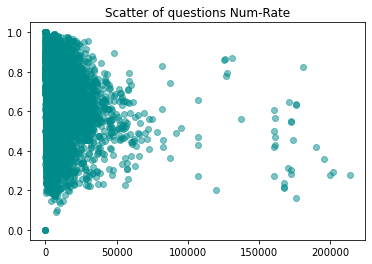

In [48]:
plt.scatter(que_info_df.num, que_info_df.rate,alpha=0.5,color='darkcyan')
plt.title('Scatter of questions Num-Rate')
plt.show()

We further extract the cluster with number under 50000 to see the scatter

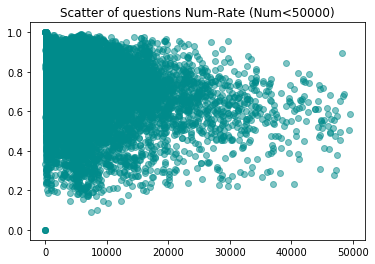

In [49]:
plt.scatter(que_info_df.num[que_info_df.num<=50000], que_info_df[que_info_df.num<=50000].rate,alpha=0.5,color='darkcyan')
plt.title('Scatter of questions Num-Rate (Num<50000)')
plt.show()

## Lectures

In [22]:
lec_info_df.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


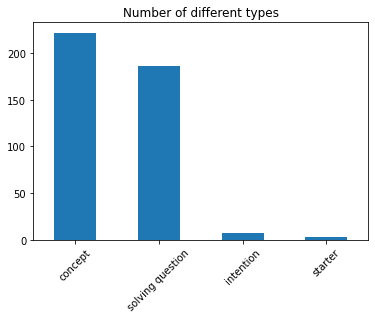

In [23]:
type_cont=lec_info_df.type_of.value_counts()
fig = plt.figure(figsize=(6,4))
ax = type_cont.plot.bar()
plt.title("Number of different types")
plt.xticks(rotation=45)
plt.show()

Also we can join what we get from the interatction data set to the lecture data set

In [24]:
tags=que_info_df['tags'][que_info_df['tags'] != "nan"].str.split(' ',expand=True).stack().reset_index(level=1,drop=True)
num_df=que_info_df[['right_num','wrong_num','num']]
tags.name="tag"
num_df=num_df.join(tags)

In [25]:
tag_df=num_df.groupby("tag").sum()
tag_df['rate']=tag_df['right_num']/tag_df['num']

In [26]:
print("Tags with poor correct rate:")
tag_df.rate.sort_values()[:10]

Tags with poor correct rate:


tag
24     0.385725
23     0.438487
19     0.439938
151    0.493155
167    0.500432
108    0.504010
58     0.504637
50     0.506375
26     0.510045
46     0.521463
Name: rate, dtype: float64

Apparently these lecture with poor correct rate needs to be improved.Statistics show that students are prone to making mistakes on these tags and they can be the hardest part of the exam